# The Question
The function we are minimizing is the Rosenbrock function, $$f(x) = 100(y - x^2)^2 + (1-x)^2$$

This function has a global minimum of 0 at $(x,y) = (1,1)$.

For the points $[-1,1], [0,1]$ and $[2,1]$
Apply the following optimization methods:
1.   Steepest Descent
2.   Newton's Method
3. BFGS



In [91]:
import numpy as np
import matplotlib.pyplot as plt

Defining the function itself

In [92]:
def f(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

# Gradient Of The Rosenbrock Function
$$\nabla f = \begin{bmatrix}-400x(y - x^2) + 2(x - 1) \\ 200(y - x^2)\end{bmatrix}$$

In [93]:
def f_grad(x):
    grad0 = -400 * x[0] * (x[1] - x[0]**2) + 2 * (x[0] - 1)
    grad1 = 200 * (x[1] - x[0]**2)
    return np.array([grad0, grad1])

# Steepest Descent

In [94]:
def steepest_descent(start_point, tol=1e-8, max_iter=2000):
    x = np.array(start_point, dtype='float64')
    path = [x]
    for i in range(max_iter):
        grad = f_grad(x)
        alpha = 1
        while f(x - alpha * grad) > f(x):
            alpha *= 0.5
        x_new = x - alpha * grad
        path.append(x_new)
        if np.linalg.norm(grad) < tol:
            break
        x = x_new
    return x, path, i + 1

# Hessian Of The Rosenbrock Function
The Hessian of the function is:
$H(f(x)) = \begin{bmatrix} 1200x^2 - 400y + 2 & -400x \\ -400x & 200 \end{bmatrix}$

In [95]:
def f_hessian(x):
    hessian = np.array([[0, 0], [0, 0]])
    hessian[0,0] = 1200 * x[0]**2 - 400 * x[1] + 2
    hessian[0,1] = -400 * x[0]
    hessian[1,0] = -400 * x[0]
    hessian[1,1] = 200
    return hessian

# Newton's Method

In [96]:
def newton_method(start_point, tol=1e-8, max_iter=2000):
    x = np.array(start_point, dtype='float64')
    path = [x]
    for i in range(max_iter):
        grad = f_grad(x)
        hess = f_hessian(x)
        step = np.linalg.solve(hess, grad)
        x_new = x - step
        path.append(x_new)
        if np.linalg.norm(step) < tol:
            break
        x = x_new
    return x, path, i + 1

# BGFS Method

In [97]:
def bfgs(start_point, tol=1e-8, max_iter=2000):
    x = np.array(start_point, dtype='float64')
    n = len(x)
    I = np.eye(n)
    B = I
    path = [x]
    for i in range(max_iter):
        grad = f_grad(x)
        step = np.linalg.solve(B, grad)
        x_new = x - step
        if np.linalg.norm(x_new - x) < tol:
            break
        s = x_new - x
        y = f_grad(x_new) - grad
        Bs = B @ s
        B = B + np.outer(y, y) / np.dot(y, s) - np.outer(Bs, Bs) / np.dot(s, Bs)
        x = x_new
        path.append(x)
    return x, path, i + 1

# Plotting The Results

In [103]:
def plot_results(path, title):
    X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-1, 3, 400))
    Z = f([X, Y])
    plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='jet')
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='o')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Evaluating The Start Points Given In The Question

## Steepest Descent

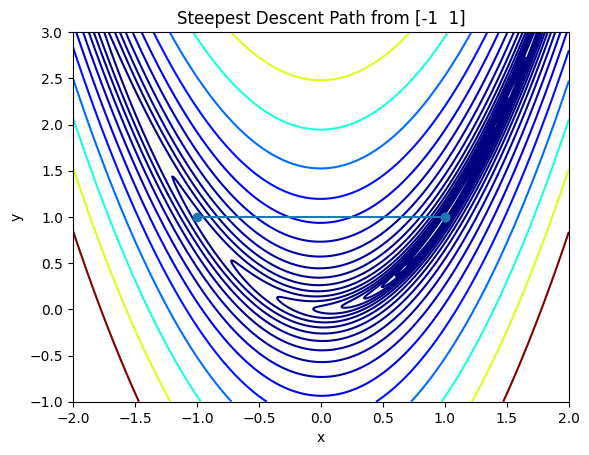

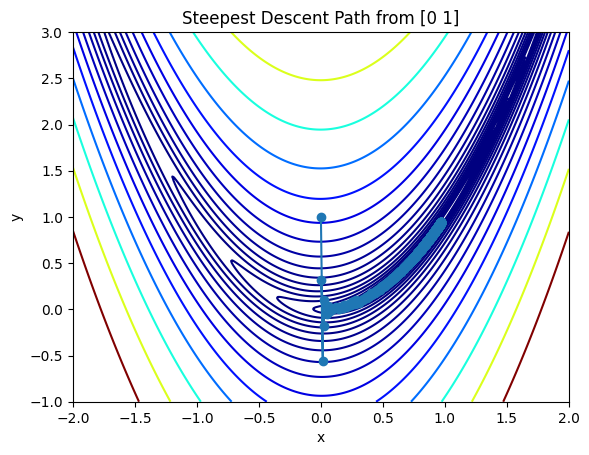

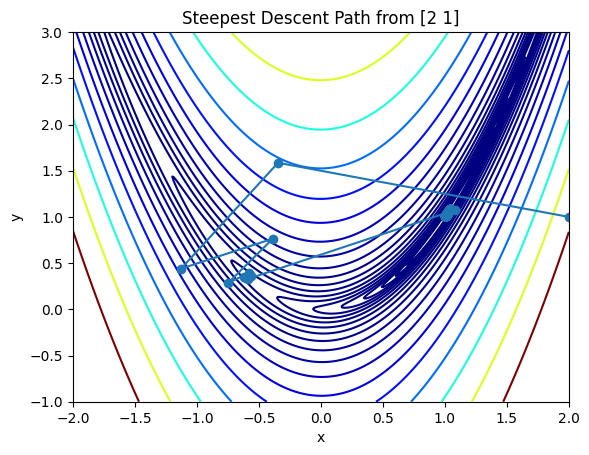

In [107]:
points = [np.array([-1, 1]), np.array([0, 1]), np.array([2, 1])]

for i in points:
    _, path, iters = steepest_descent(i)
    plot_results(path, f'Steepest Descent Path from {i}')

## Newton's Method

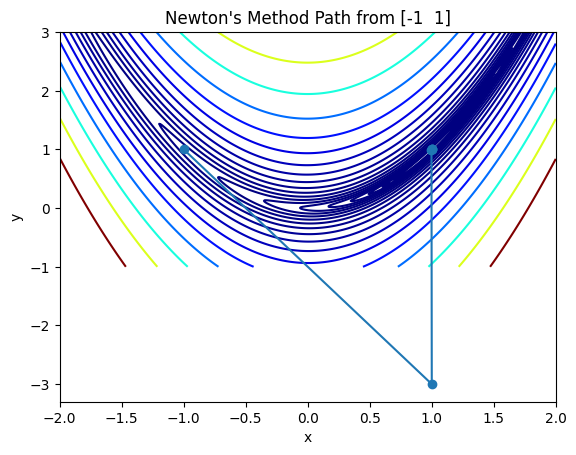

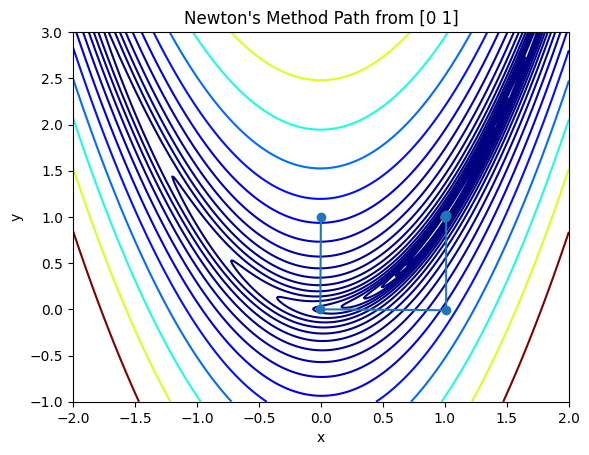

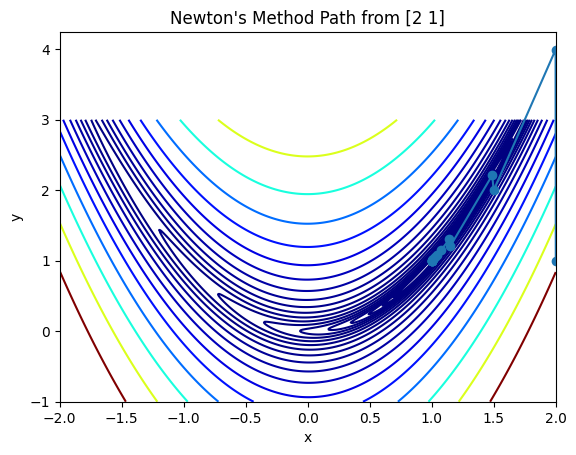

In [108]:
for i in points:
    _, path, iters = newton_method(i)
    plot_results(path, f'Newton\'s Method Path from {i}')

# BFGS

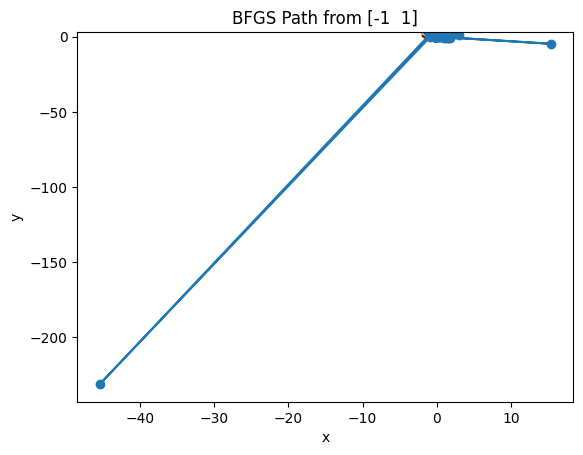

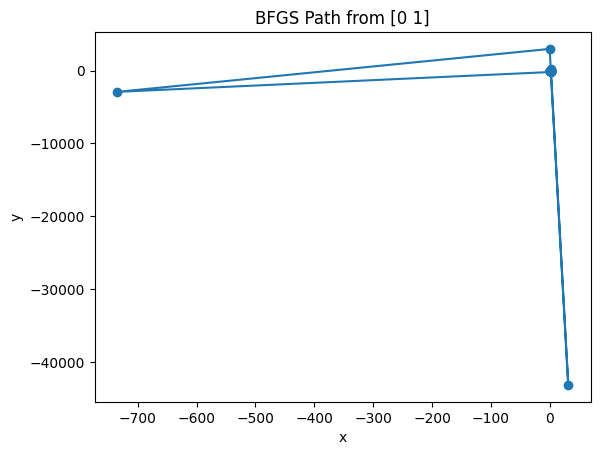

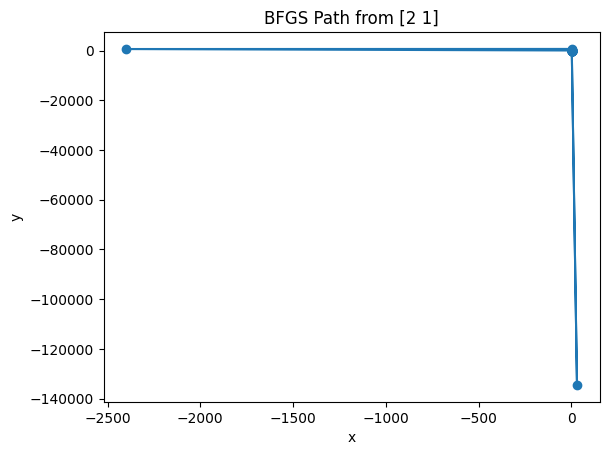

In [109]:
for i in points:
    _, path, iters = bfgs(i)
    plot_results(path, f'BFGS Path from {i}')

# Final Number Of Iterations

In [ ]:
for i in points:
  _, path, iters = steepest_descent(i)
  print(f'Steepest Descent starting from {i} took {iters} iterations.')
  _, path, iters = newton_method(i)
  print(f'Newton\'s Method starting from {i} took {iters} iterations.')
  _, path, iters = bfgs(i)
  print(f'BFGS starting from {i} took {iters} iterations.')